## whale.ipynb
This notebook shows you how much money you'd have to spend to get a 5 star character in a character banner wish. I wrote it when I was trying to figure out how much money I could responsibly spend in an attempt to get Klee.

## To do
* Incorporate 5* rates improving as the banner continues. This currently is not in the notebook which means the rates present in this notebook are slightly more conservative than they should be.

In [1]:
from matplotlib import pyplot as plt 
import numpy as np

In [2]:
char5srate = 0.5 # 50% of five star wishes are the 5 star in the character banner
pity = 90 # every 90 wishes you get a pity 5*
gemsperwish = 160 # 160 primogems per wish
gemsForFiveStar = pity * gemsperwish

In [3]:
# Calculate probability of obtaining a banner 5 star as a function of number of piy rolls (every 90 Wishes)
n = 10
prob5s = []
for i in range(n):
  lin = np.linspace(1,i,i)
  prob5s.append(sum([char5srate**ii for ii in lin]))

for i,k in enumerate(prob5s):
  print("If you rolled %d wishes, you would have a %.2f percent chance to get a 5 star in the character banner." % (
      i*pity,k))

If you rolled 0 wishes, you would have a 0.00 percent chance to get a 5 star in the character banner.
If you rolled 90 wishes, you would have a 0.50 percent chance to get a 5 star in the character banner.
If you rolled 180 wishes, you would have a 0.75 percent chance to get a 5 star in the character banner.
If you rolled 270 wishes, you would have a 0.88 percent chance to get a 5 star in the character banner.
If you rolled 360 wishes, you would have a 0.94 percent chance to get a 5 star in the character banner.
If you rolled 450 wishes, you would have a 0.97 percent chance to get a 5 star in the character banner.
If you rolled 540 wishes, you would have a 0.98 percent chance to get a 5 star in the character banner.
If you rolled 630 wishes, you would have a 0.99 percent chance to get a 5 star in the character banner.
If you rolled 720 wishes, you would have a 1.00 percent chance to get a 5 star in the character banner.
If you rolled 810 wishes, you would have a 1.00 percent chance to g

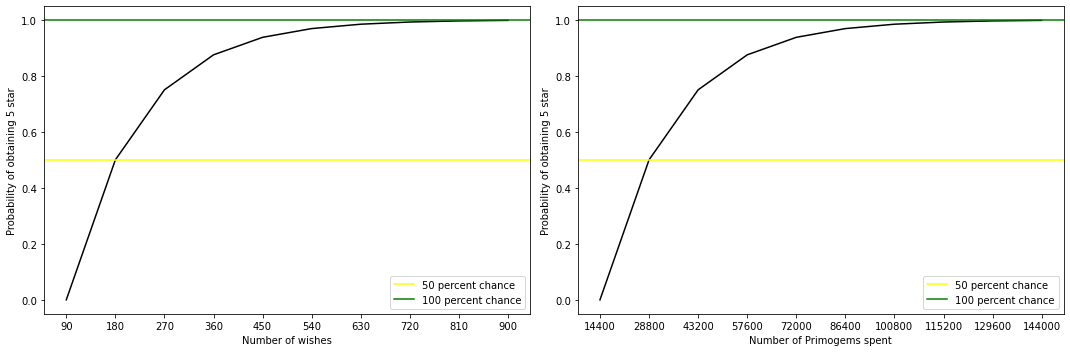

In [4]:
# Wishes / Primogems spent as a probability curve
x = np.linspace(1,n,n)
plt.figure(figsize=(15,5))
plt.subplot(1,2,1)
# Probability of getting 5 star as a function of the number of rolls you do
plt.plot(x,prob5s,color='k');
plt.axhline(.5,color='yellow',label="50 percent chance")
plt.axhline(1,color='green',label="100 percent chance")
xlabels = np.array(x*pity).astype(int)
plt.xticks(ticks=x,labels=xlabels)
plt.gca().set_xticklabels(xlabels)
plt.xlabel("Number of wishes");
plt.ylabel("Probability of obtaining 5 star");
plt.legend();

# Probability of getting 5 star as a function of primogems spent
plt.subplot(1,2,2)
plt.plot(x,prob5s,color='k');
plt.axhline(.5,color='yellow',label="50 percent chance")
plt.axhline(1,color='green',label="100 percent chance")
xlabels = np.array(x*(pity*gemsperwish)).astype(int)
plt.xticks(ticks=x,labels=xlabels)
plt.gca().set_xticklabels(xlabels)
plt.xlabel("Number of Primogems spent");
plt.ylabel("Probability of obtaining 5 star");
plt.legend();
plt.tight_layout()

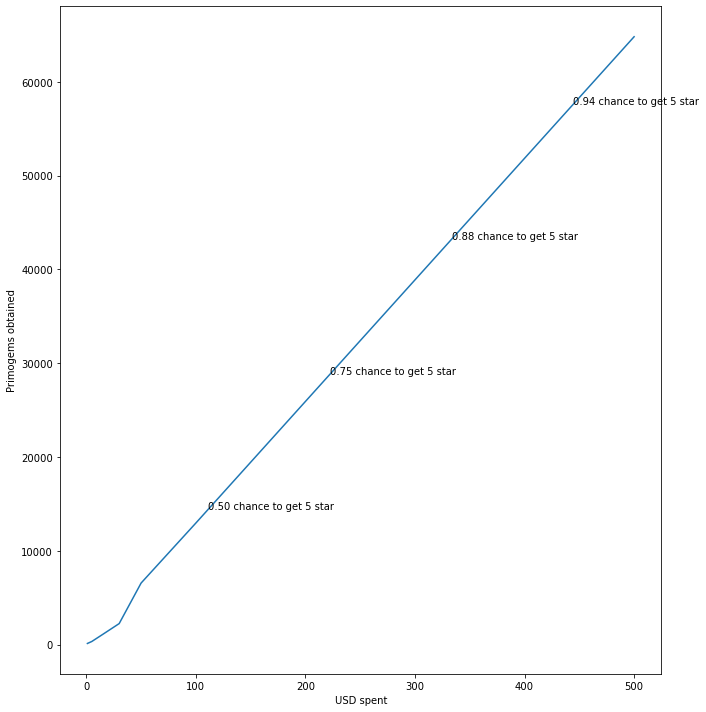

In [5]:
plt.figure(figsize=(10,10));
usd = [.99,4.99,14.99,29.99,49.99,99.99] # increments of Crystal Top Up you can buy in USD
gems = [120,330,1090,2240,6560,12960] # the gems you get from those Top Ups
# approximation given model is basically linear after you spend more than 100 bucks on the game. js
gemsperUSD = gems[-1]/usd[-1]
maxUSD = usd[-1]
maxGems = gems[-1]
for whale in range(5): # capping this at 500 USD
  usd.append(maxUSD*(whale+1))
  gems.append(maxGems*(whale+1))
plt.plot(usd,gems);
# plt.xticks(usd);
plt.xlabel("USD spent")
# plt.yticks(gems);
plt.ylabel("Primogems obtained")
rolls5s = 0
for i in range(gems[-1]):
  if i/gemsForFiveStar in [1.,2.,3.,4.,5.]:
    rolls5s +=1
    plt.text(x=i/gemsperUSD,y=i,s="%.2f chance to get 5 star" % prob5s[rolls5s])
plt.tight_layout()